In [1]:
import pandas as pd

# Bitcoin time series analysis...
-Viswanadh

In [2]:
df=pd.read_csv("bitcoin.csv")

In [3]:
df.head(5)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [4]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [5]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df['Date'].dtype

dtype('<M8[ns]')

In [8]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

In [9]:
df=df.set_index('Date')

In [10]:
df=df.sort_index()

In [11]:
df.head(5)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


# Exploratory data analysis

In [12]:
data=df.copy()

In [13]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Bitcoin price')

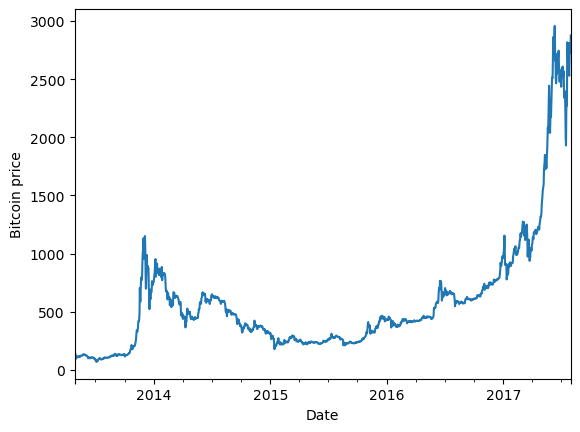

In [14]:
data['Close'].plot(kind="line")
plt.ylabel("Bitcoin price")

In [15]:
data2=data['Close']

In [16]:
data2.head(5)

Date
2013-04-28    134.21
2013-04-29    144.54
2013-04-30    139.00
2013-05-01    116.99
2013-05-02    105.21
Name: Close, dtype: float64

# Resampling data

In [17]:
data2.resample('W').sum()

Date
2013-04-28      134.21
2013-05-05      831.90
2013-05-12      797.48
2013-05-19      830.97
2013-05-26      894.13
                ...   
2017-07-09    17984.69
2017-07-16    15629.11
2017-07-23    17846.60
2017-07-30    18825.21
2017-08-06     2875.34
Freq: W-SUN, Name: Close, Length: 224, dtype: float64

In [18]:
data2.resample('M').sum()

Date
2013-04-30      417.75
2013-05-31     3719.79
2013-06-30     3232.84
2013-07-31     2805.88
2013-08-31     3531.06
2013-09-30     3901.85
2013-10-31     4907.67
2013-11-30    16512.62
2013-12-31    24824.21
2014-01-31    26169.22
2014-02-28    18525.31
2014-03-31    18358.21
2014-04-30    13840.86
2014-05-31    15086.19
2014-06-30    18477.52
2014-07-31    19158.79
2014-08-31    16618.72
2014-09-30    13355.59
2014-10-31    11288.65
2014-11-30    10983.00
2014-12-31    10579.32
2015-01-31     7712.26
2015-02-28     6556.30
2015-03-31     8340.28
2015-04-30     7064.75
2015-05-31     7346.90
2015-06-30     7142.43
2015-07-31     8666.48
2015-08-31     7772.77
2015-09-30     7007.86
2015-10-31     8210.51
2015-11-30    10466.50
2015-12-31    13158.40
2016-01-31    12736.18
2016-02-29    11727.84
2016-03-31    12912.28
2016-04-30    13030.18
2016-05-31    14320.57
2016-06-30    19286.09
2016-07-31    20502.02
2016-08-31    17967.14
2016-09-30    18175.45
2016-10-31    19950.05
2016-1

<AxesSubplot:xlabel='Date'>

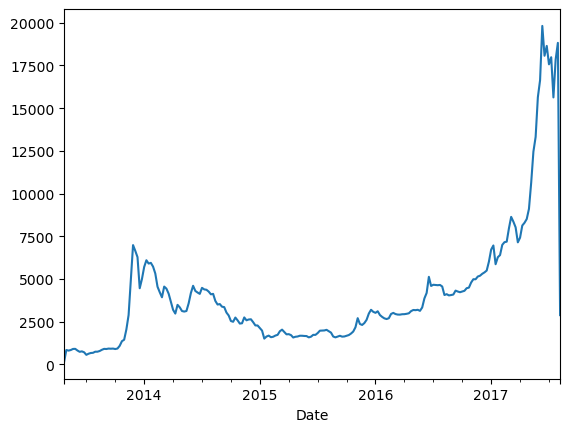

In [19]:
data2.resample('W').sum().plot(kind="line")

<AxesSubplot:xlabel='Date'>

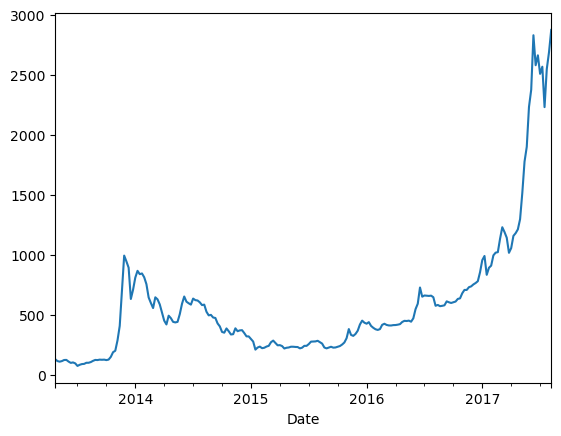

In [20]:
data2.resample('W').mean().plot(kind="line")

<AxesSubplot:xlabel='Date'>

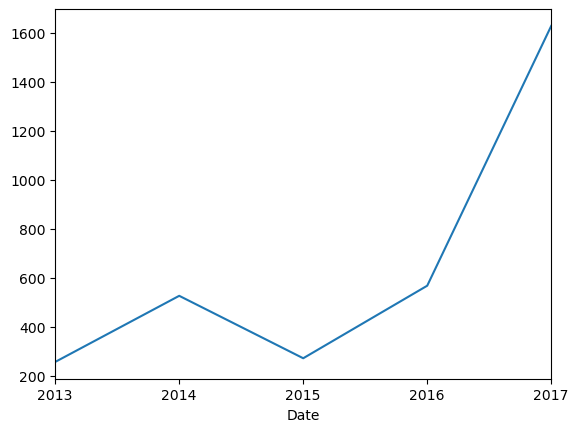

In [21]:
data2.resample("Y").mean().plot(kind="line")

In [22]:
!pip install prophet

In [23]:
import prophet

In [24]:
data.groupby(data2.index.dayofweek)['Close'].mean()

Date
0    588.738655
1    582.402658
2    581.731216
3    585.565135
4    583.876622
5    584.545180
6    582.802511
Name: Close, dtype: float64

# EDA W.R.T WEEKDAY AND YEARDAY

<AxesSubplot:xlabel='Date'>

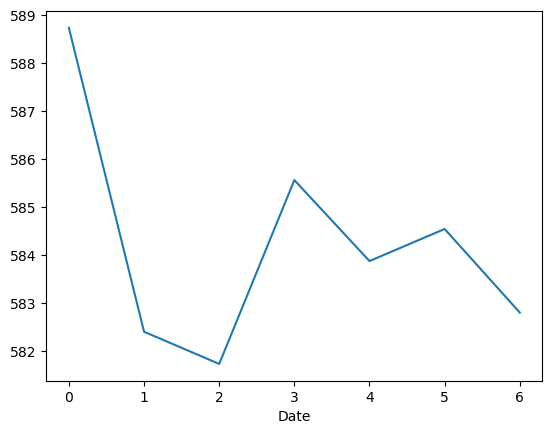

In [25]:
data.groupby(data2.index.dayofweek)['Close'].mean().plot(kind="line")

In [26]:
weekday=data.groupby(data2.index.dayofweek)['Close'].mean()

In [27]:
weekday.index=["MON","TUE","WED","THU","FRI","SAT","SUN"]

In [28]:
weekday

MON    588.738655
TUE    582.402658
WED    581.731216
THU    585.565135
FRI    583.876622
SAT    584.545180
SUN    582.802511
Name: Close, dtype: float64

Text(0, 0.5, 'Close')

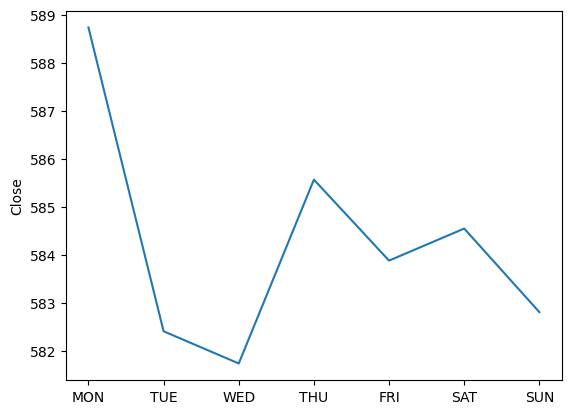

In [29]:
weekday.plot(kind="line")
plt.ylabel("Close")

In [30]:
data2.index

DatetimeIndex(['2013-04-28', '2013-04-29', '2013-04-30', '2013-05-01',
               '2013-05-02', '2013-05-03', '2013-05-04', '2013-05-05',
               '2013-05-06', '2013-05-07',
               ...
               '2017-07-22', '2017-07-23', '2017-07-24', '2017-07-25',
               '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-29',
               '2017-07-30', '2017-07-31'],
              dtype='datetime64[ns]', name='Date', length=1556, freq=None)

In [31]:
data.groupby(data2.index.dayofyear)['Close'].mean()

Date
1      629.5775
2      643.1525
3      643.4125
4      677.8800
5      663.3350
         ...   
362    600.1375
363    616.6550
364    616.7475
365    616.5025
366    963.7400
Name: Close, Length: 366, dtype: float64

In [32]:
year_day=data.groupby(data.index.dayofyear)['Close'].mean()

Text(0, 0.5, 'Closing price')

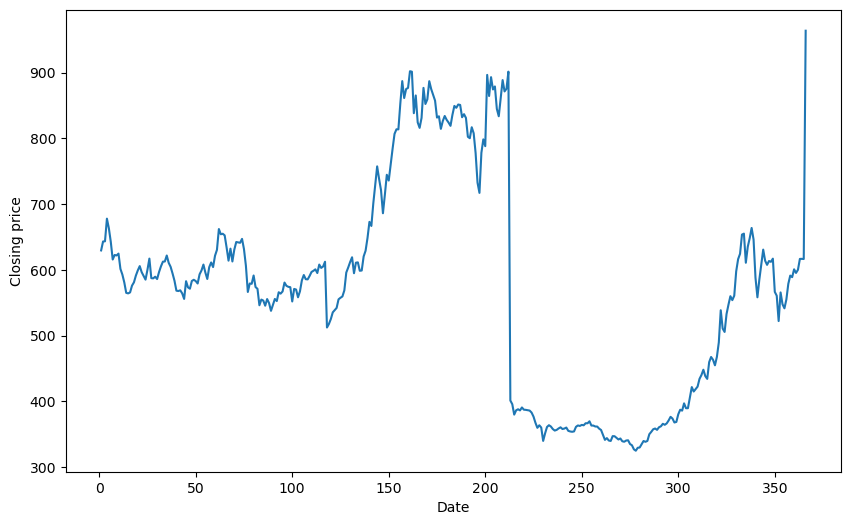

In [33]:
plt.figure(figsize=(10,6))
year_day.plot(kind="line")
plt.ylabel("Closing price")

Text(0, 0.5, 'Closing price')

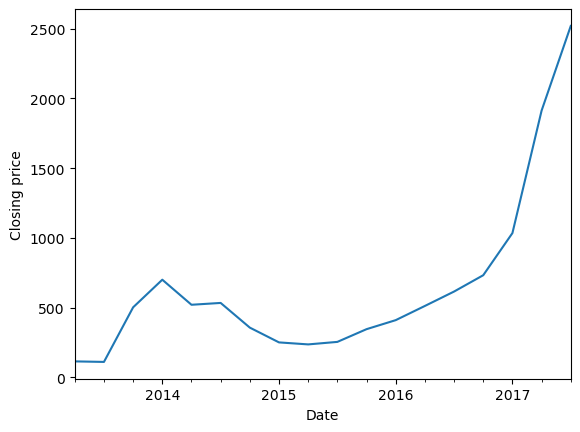

In [34]:
data['Close'].resample('Q').mean().plot(kind="line")
plt.ylabel("Closing price")

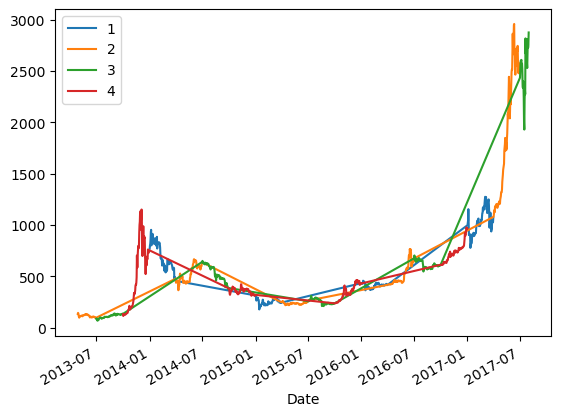

In [35]:
data.groupby(data2.index.quarter)['Close'].plot(kind="line")
plt.legend()

# Analyze the trend of closing price in weekdays and weekends

In [36]:
type(weekday)

pandas.core.series.Series

In [37]:
weekday

MON    588.738655
TUE    582.402658
WED    581.731216
THU    585.565135
FRI    583.876622
SAT    584.545180
SUN    582.802511
Name: Close, dtype: float64

In [38]:
weekday

MON    588.738655
TUE    582.402658
WED    581.731216
THU    585.565135
FRI    583.876622
SAT    584.545180
SUN    582.802511
Name: Close, dtype: float64

In [39]:
data['WeekDay']=data2.index.dayofweek

In [40]:
data.head(5)

,Open,High,Low,Close,Volume,Market Cap,WeekDay
Date,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",6
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",0
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",1
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",2
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",3


In [41]:
def Week(row):
    if row['WeekDay']==6 or row['WeekDay']==7:
        return "Weekend"
    else:
        return "Weekday"

In [42]:
data['Weekday/Weekend']=data.apply(Week,axis=1)

In [43]:
data.head(5)

,Open,High,Low,Close,Volume,Market Cap,WeekDay,Weekday/Weekend
Date,,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",6,Weekend
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",0,Weekday
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",1,Weekday
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",2,Weekday
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",3,Weekday


<AxesSubplot:xlabel='Weekday/Weekend'>

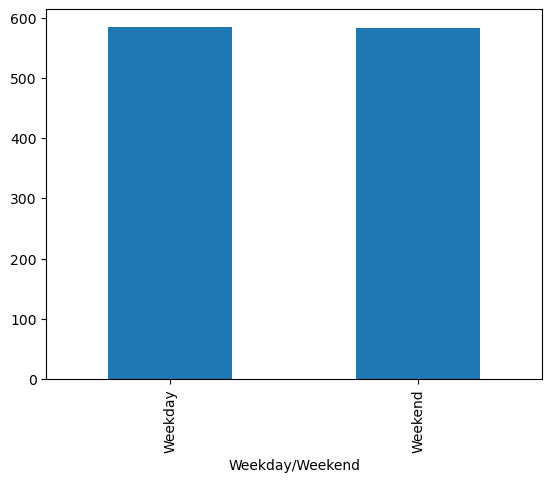

In [44]:
data.groupby(['Weekday/Weekend'])['Close'].mean().plot(kind="bar")

In [45]:
data['prediction_naive']=data['Close'].shift(1)

In [46]:
data.head(5)

,Open,High,Low,Close,Volume,Market Cap,WeekDay,Weekday/Weekend,prediction_naive
Date,,,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",6,Weekend,NaN
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",0,Weekday,134.21
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",1,Weekday,144.54
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",2,Weekday,139.00
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",3,Weekday,116.99


<AxesSubplot:xlabel='Date'>

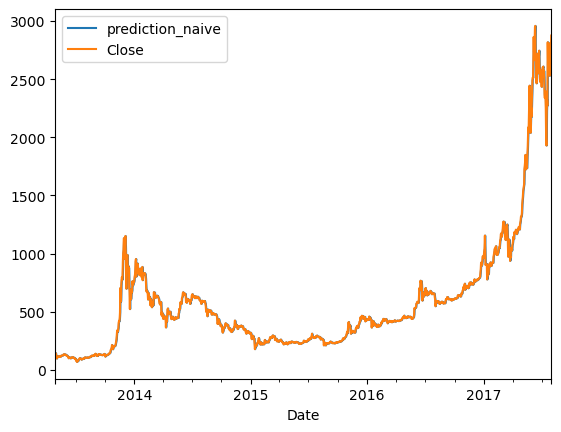

In [47]:
data[['prediction_naive','Close']].plot(kind="line")

In [48]:
from sklearn.metrics import mean_squared_error

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [49]:
import numpy as np

In [50]:
np.sqrt(mean_squared_error(data['prediction_naive'][1:],data['Close'][1:]))

37.23363264835875

# Checking for noise

In [51]:
mean=data['Close'].rolling(window=7).mean()
std=data['Close'].rolling(window=7).std()

<AxesSubplot:xlabel='Date'>

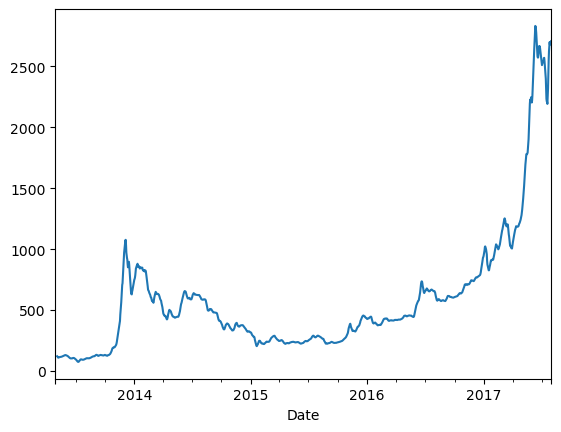

In [52]:
mean.plot(kind="line")

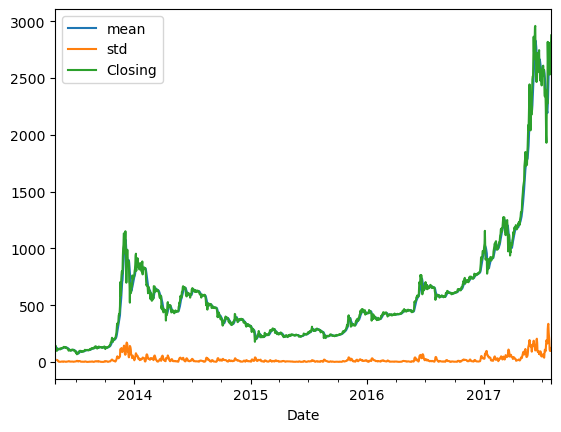

In [53]:
mean.plot(label="mean")
std.plot(label="std")
data['Close'].plot(label="Closing")
plt.legend()

# Performing Statistical tests to detect Stationarity

In [54]:
from statsmodels.tsa.stattools import adfuller

In [55]:
results=adfuller(data['Close'])
labels=['Adf','P','lags','no.of obs']
for value,label in zip(results,labels):
    print('{}:{}'.format(label,value))

Adf:2.5355885873886206
P:0.9990604352222925
lags:24
no.of obs:1531


In [56]:
def test_stationarity(df,feature):
    df[feature].plot(label="feature")
    mean=df[feature].rolling(window=7).mean()
    std=df[feature].rolling(window=7).std()
    mean.plot(label="mean")
    std.plot(label="std")
    res=adfuller(df[feature].dropna())
    lab=['Adf','P','lags','no.of obs']
    for val,label in zip(res,lab):
        print('{},{}'.format(label,val))
    if res[1]<=0.05:
        print("The curves is stationary")
    else:
        print("The curve does not have a constant mean and standard deviation-variance")
    

Adf,2.5355885873886206
P,0.9990604352222925
lags,24
no.of obs,1531
The curve does not have a constant mean and standard deviation-variance


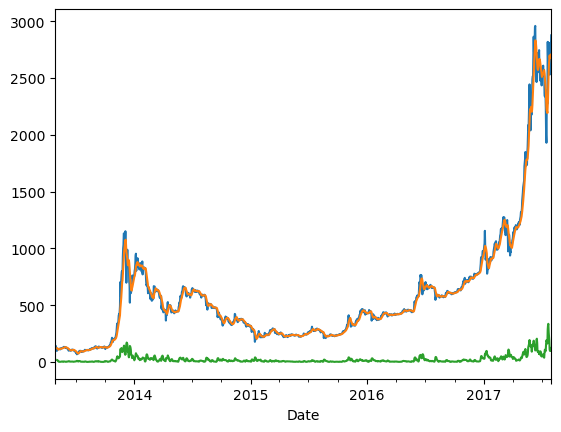

In [57]:
test_stationarity(data,'Close')

Applying log trasformation to reduce the effect of outliers and enhance the model

In [58]:
np.log(data['Close'])

Date
2013-04-28    4.899406
2013-04-29    4.973556
2013-04-30    4.934474
2013-05-01    4.762088
2013-05-02    4.655958
                ...   
2017-07-27    7.890500
2017-07-28    7.940587
2017-07-29    7.910756
2017-07-30    7.921964
2017-07-31    7.963926
Name: Close, Length: 1556, dtype: float64

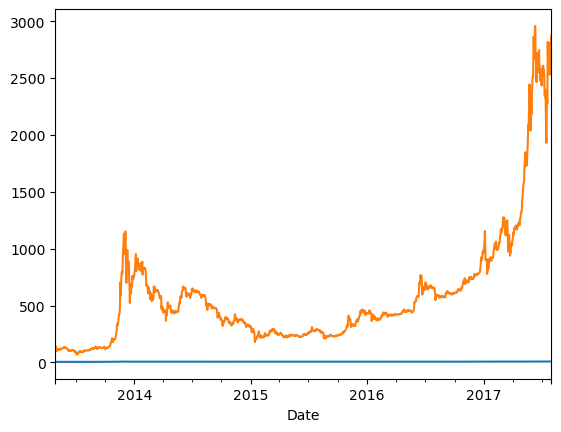

In [59]:
np.log(data['Close']).plot(label="log")
data['Close'].plot(label="Close")
plt.show()

In [60]:
log_data=np.log(data['Close'])

In [61]:
log_data

Date
2013-04-28    4.899406
2013-04-29    4.973556
2013-04-30    4.934474
2013-05-01    4.762088
2013-05-02    4.655958
                ...   
2017-07-27    7.890500
2017-07-28    7.940587
2017-07-29    7.910756
2017-07-30    7.921964
2017-07-31    7.963926
Name: Close, Length: 1556, dtype: float64

<AxesSubplot:xlabel='Date'>

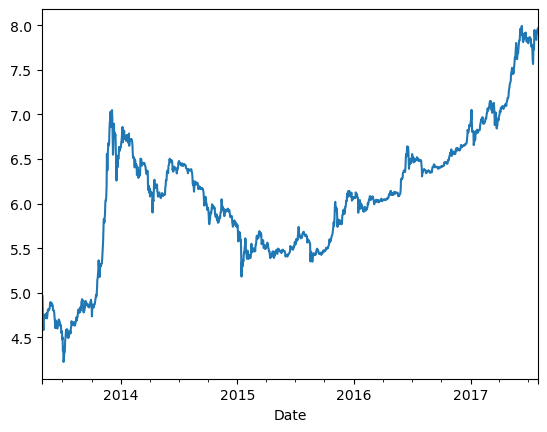

In [62]:
log_data.plot()

In [63]:
rolling_ave=log_data-log_data.shift(7)

In [64]:
rolling_ave

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
                ...   
2017-07-27   -0.053141
2017-07-28    0.051593
2017-07-29   -0.030227
2017-07-30    0.009760
2017-07-31    0.042804
Name: Close, Length: 1556, dtype: float64

In [65]:
Rolling_ave=log_data.rolling(window=7).mean()

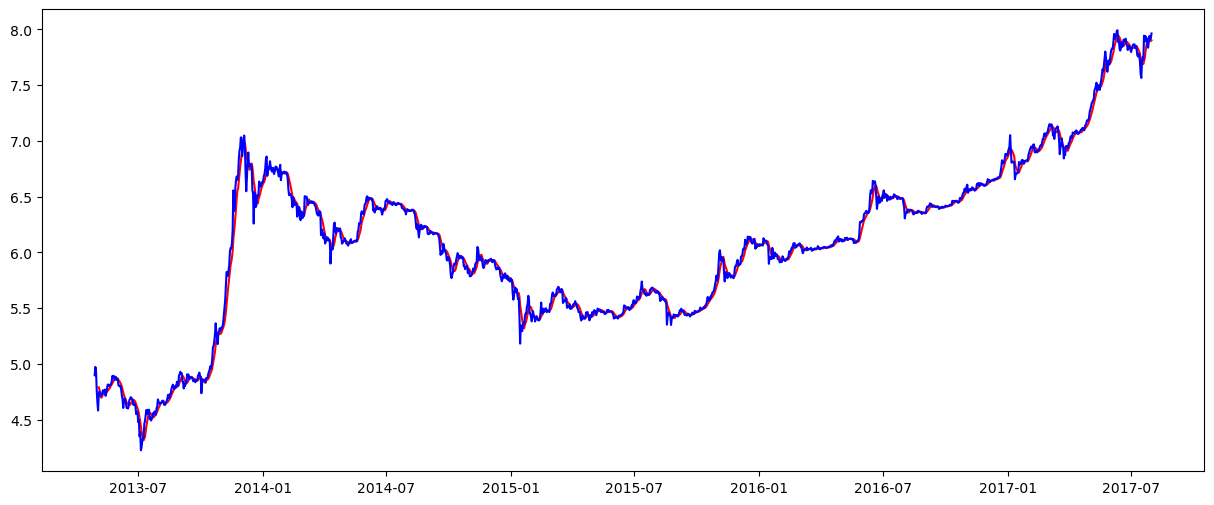

In [66]:
plt.figure(figsize=(15,6))
plt.plot(Rolling_ave,label="Rolling ave",color="red")
plt.plot(log_data,label="log_data",color="blue")

In [67]:
lr_diff=log_data-Rolling_ave

In [68]:
data['lr_diff']=lr_diff

Adf,-7.191325804532459
P,2.4992600031569224e-10
lags,22
no.of obs,1527
The curves is stationary


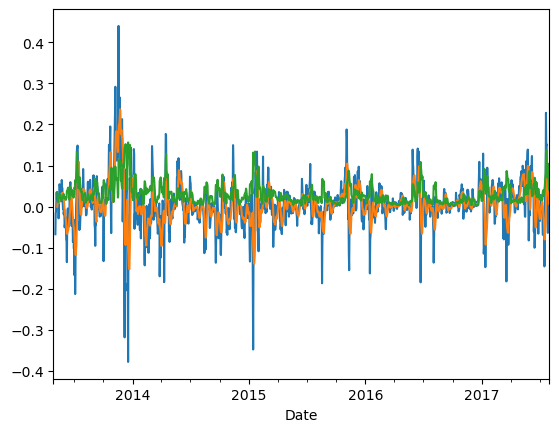

In [69]:
test_stationarity(data,'lr_diff')

In [70]:
log_ts=log_data-log_data.shift(7)

<AxesSubplot:xlabel='Date'>

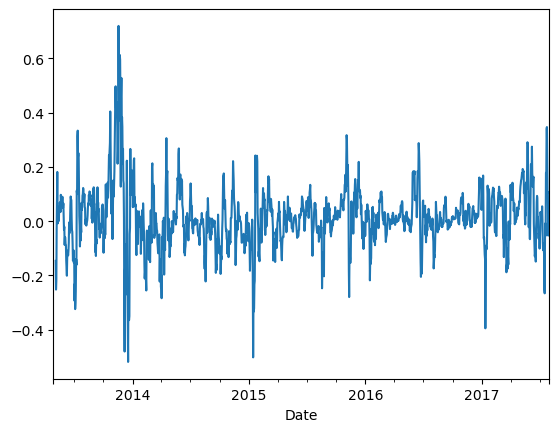

In [71]:
log_ts.plot(kind="line")

In [72]:
data['log_ts']=log_ts

In [73]:
data['log_ts']

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
                ...   
2017-07-27   -0.053141
2017-07-28    0.051593
2017-07-29   -0.030227
2017-07-30    0.009760
2017-07-31    0.042804
Name: log_ts, Length: 1556, dtype: float64

Adf,-6.523573613344045
P,1.0277739422835382e-08
lags,23
no.of obs,1525
The curves is stationary


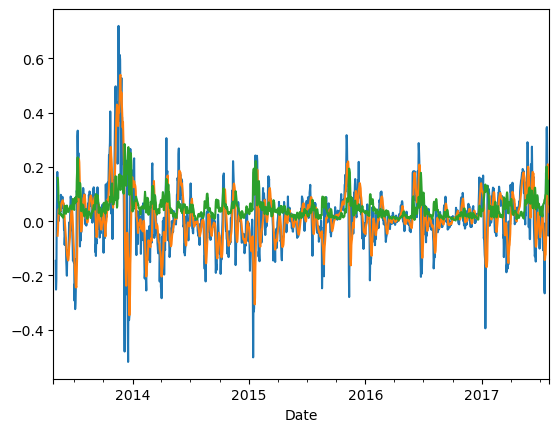

In [74]:
test_stationarity(data,'log_ts')

In [75]:
df=data[['Close']]

In [76]:
df.head(5)

,Close
Date,
2013-04-28,134.21
2013-04-29,144.54
2013-04-30,139.00
2013-05-01,116.99
2013-05-02,105.21


In [77]:
df=df.reset_index()

In [78]:
df.columns=['ds','y']

In [79]:
df.head(5)

,ds,y
0,2013-04-28,134.21
1,2013-04-29,144.54
2,2013-04-30,139.00
3,2013-05-01,116.99
4,2013-05-02,105.21


In [80]:
from prophet import Prophet

In [81]:
model=Prophet()

In [82]:
m=model.fit(df)

11:58:48 - cmdstanpy - INFO - Chain [1] start processing
11:58:48 - cmdstanpy - INFO - Chain [1] done processing


In [83]:
future=m.make_future_dataframe(periods=500,freq='D')

In [84]:
future.head()

,ds
0,2013-04-28
1,2013-04-29
2,2013-04-30
3,2013-05-01
4,2013-05-02


In [85]:
forecast=m.predict(future)

In [86]:
forecast.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-04-28,75.668158,-213.608880,53.750703,75.668158,75.668158,-155.702090,-155.702090,-155.702090,-2.733131,-2.733131,-2.733131,-152.968959,-152.968959,-152.968959,0.0,0.0,0.0,-80.033932
1,2013-04-29,73.564780,-205.502627,66.139702,73.564780,73.564780,-145.082098,-145.082098,-145.082098,1.467342,1.467342,1.467342,-146.549440,-146.549440,-146.549440,0.0,0.0,0.0,-71.517318
2,2013-04-30,71.461402,-207.089340,70.234940,71.461402,71.461402,-137.664186,-137.664186,-137.664186,2.473341,2.473341,2.473341,-140.137527,-140.137527,-140.137527,0.0,0.0,0.0,-66.202784
3,2013-05-01,69.358024,-202.999427,63.770095,69.358024,69.358024,-133.646489,-133.646489,-133.646489,0.064176,0.064176,0.064176,-133.710665,-133.710665,-133.710665,0.0,0.0,0.0,-64.288464
4,2013-05-02,67.254646,-189.266287,96.380559,67.254646,67.254646,-125.061137,-125.061137,-125.061137,2.181269,2.181269,2.181269,-127.242406,-127.242406,-127.242406,0.0,0.0,0.0,-57.806490


In [87]:
df.shape

(1556, 2)

In [88]:
future.shape

(2056, 1)

In [89]:
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail(10)

,ds,yhat_lower,yhat_upper,yhat
2046,2018-12-04,3022.644725,8277.669592,5595.841297
2047,2018-12-05,2969.445294,8270.988003,5595.336318
2048,2018-12-06,3020.755327,8323.243269,5598.770063
2049,2018-12-07,2987.945609,8264.366701,5596.192408
2050,2018-12-08,2933.405186,8323.960456,5595.520946
2051,2018-12-09,2966.661116,8336.091831,5595.074492
2052,2018-12-10,2989.356844,8359.973744,5599.058165
2053,2018-12-11,2940.130633,8371.738595,5599.684158
2054,2018-12-12,2892.504017,8336.539336,5596.819638
2055,2018-12-13,2930.783052,8435.378785,5598.490599


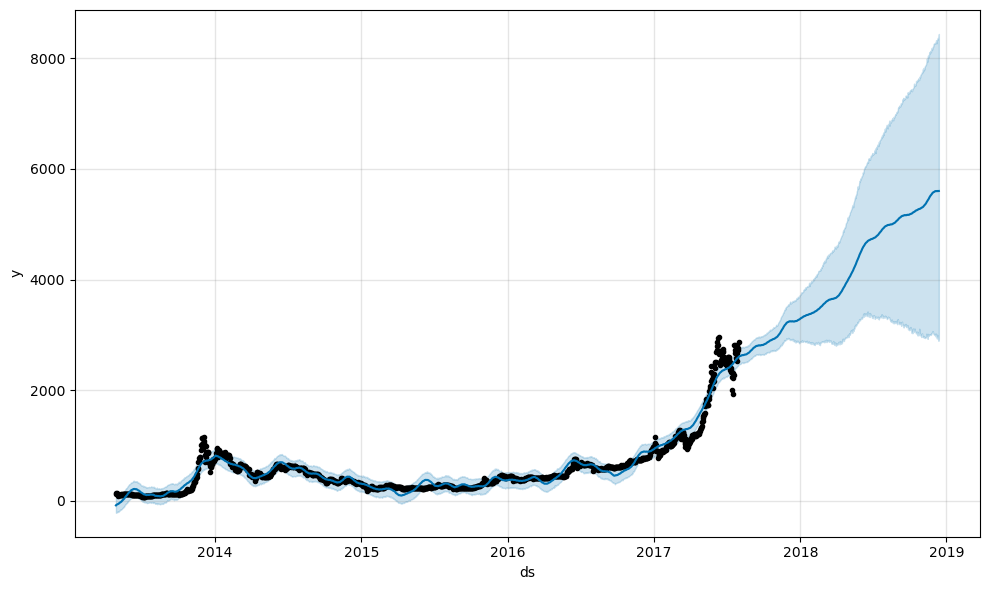

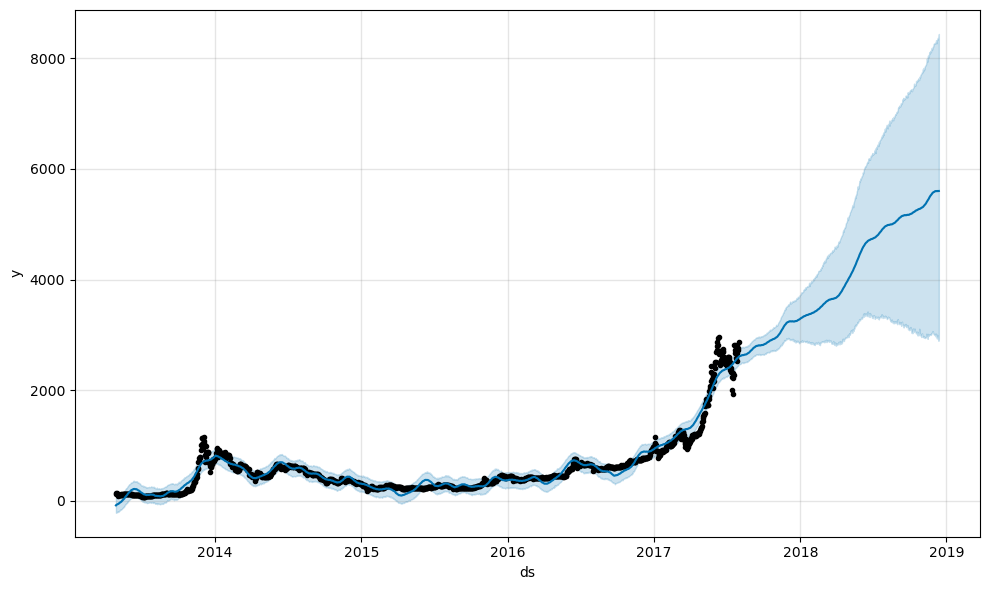

In [90]:
model.plot(forecast)